# Customer churn prediction using python
---

- Author: Masud Rahman (masud90.github.io)
- Dataset: Telco Customer Churn (https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

## About the dataset

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## Initialize setup

In [3]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
sns.set_style(style='whitegrid')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , f1_score , precision_score , recall_score , confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Data loading and inspection

In [5]:
# Import data as a pandas dataframe
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Read the shape of the dataset
print("The dataset shape is {}".format(data.shape))

The dataset shape is (7043, 21)


In [6]:
# Read the first few rows to visually inspect dataset
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [7]:
# Summary statistics (numerical variables)
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Note: from here, we can see there are no missing values. However, some variables are incorrectly identified. The 'SeniorCitizen' variable should be categorical, and the 'TotalCharges' variable should be float. Let us make these changes now.

In [10]:
# Convert SeniorCitizen from integer to categorical
data['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [11]:
# Convert the values using a dictionary
data.replace({'SeniorCitizen': {0: 'No', 1: 'Yes'}}, inplace=True)

# Confirm conversion
print(data['SeniorCitizen'].value_counts())

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64


In [12]:
## Convert TotalCharges from string to float
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [13]:
# Do not need ID variable for analysis
data.drop(columns=['customerID'], inplace=True)

In [14]:
# Verify the conversions
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Treat missing values

<Axes: >

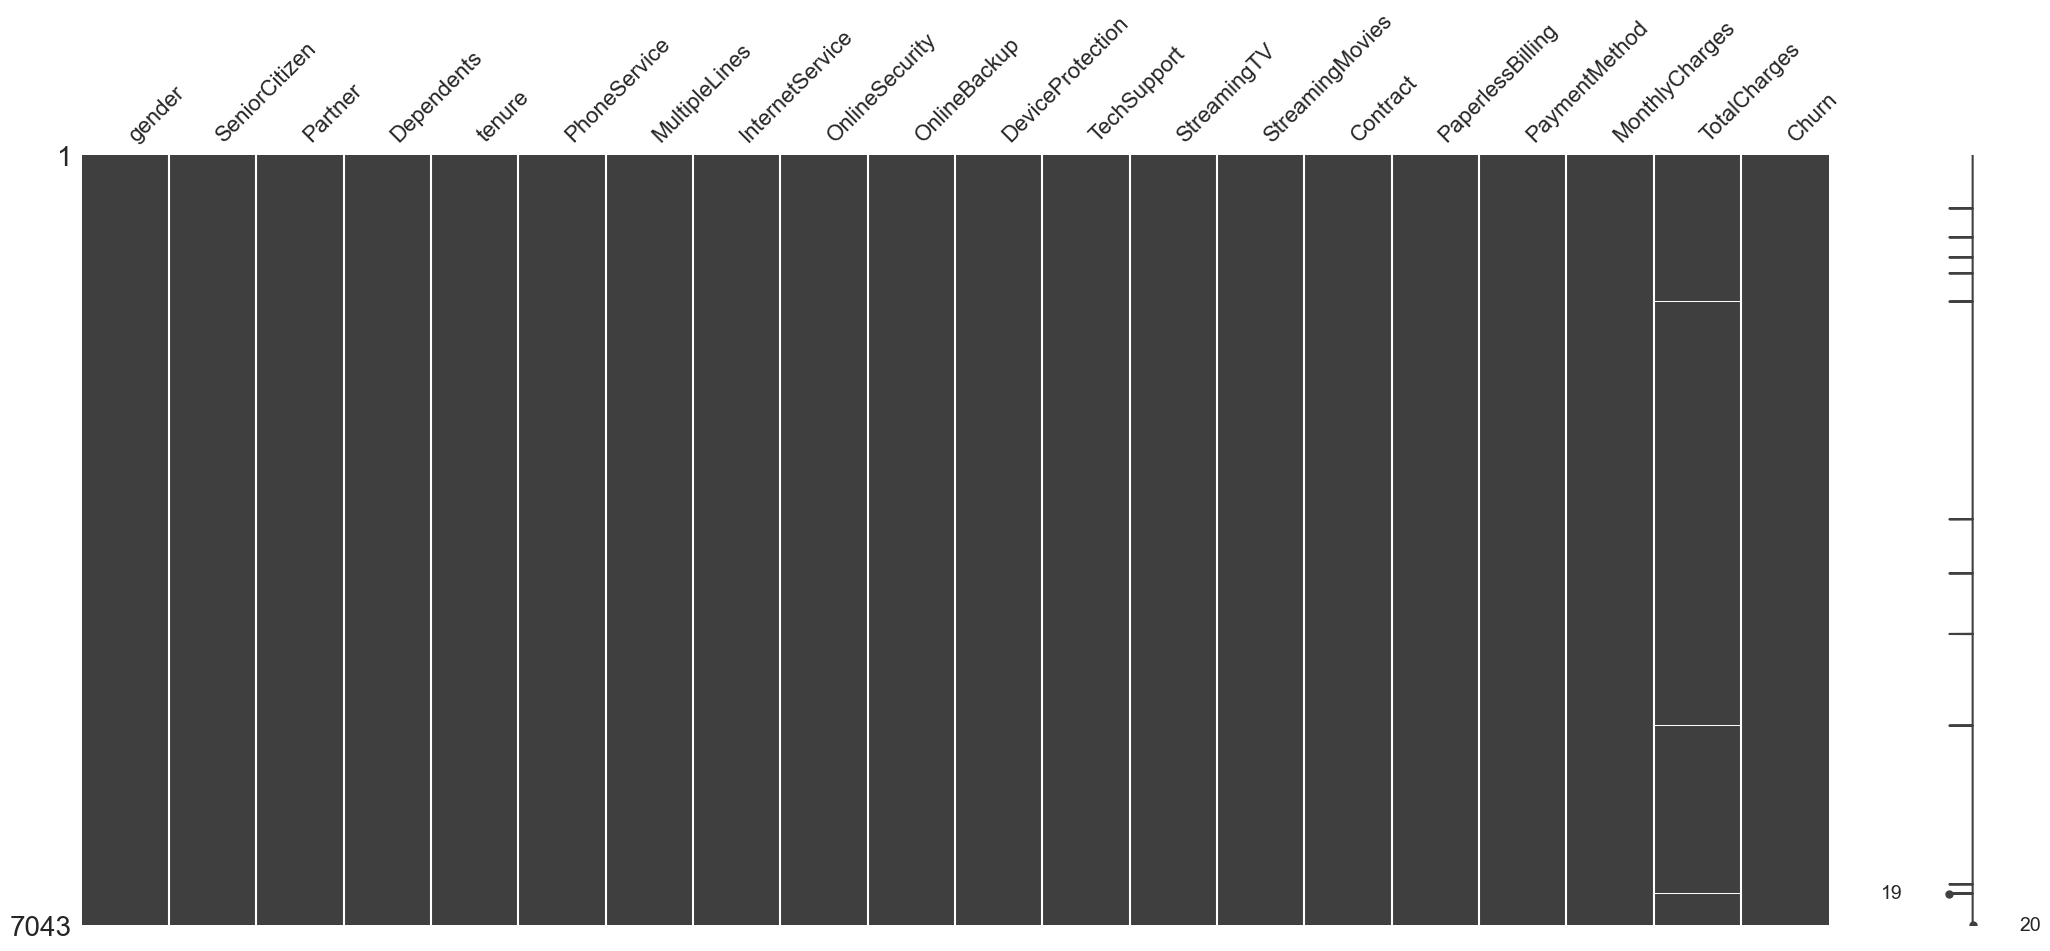

In [16]:
# visualize missing values
msno.matrix(data)

In [17]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 TotalCharges    11
dtype: int64


In [18]:
# Show rows where TotalCharges is missing
missing_total_charges = data[data['TotalCharges'].isnull()]
print("Rows where TotalCharges is missing:")
missing_total_charges.T

Rows where TotalCharges is missing:


,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,No,No,No,No,No,No,No,No,No,No,No
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
OnlineBackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


Note: it appears that everyone who has a missing value in the TotalCharges column has been a client with a tenure of 0 months. In this case, we can impute the missing values with 0.

In [20]:
# Impute the missing values with 0
data.loc[data['TotalCharges'].isnull() & (data['tenure'] == 0), 'TotalCharges'] = 0
# verify the imputation
print("Missing values in TotalCharges after imputation:", data['TotalCharges'].isnull().sum())
data[data['TotalCharges'] == 0].T

Missing values in TotalCharges after imputation: 0


,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,No,No,No,No,No,No,No,No,No,No,No
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
OnlineBackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


## Exploraty data analysis

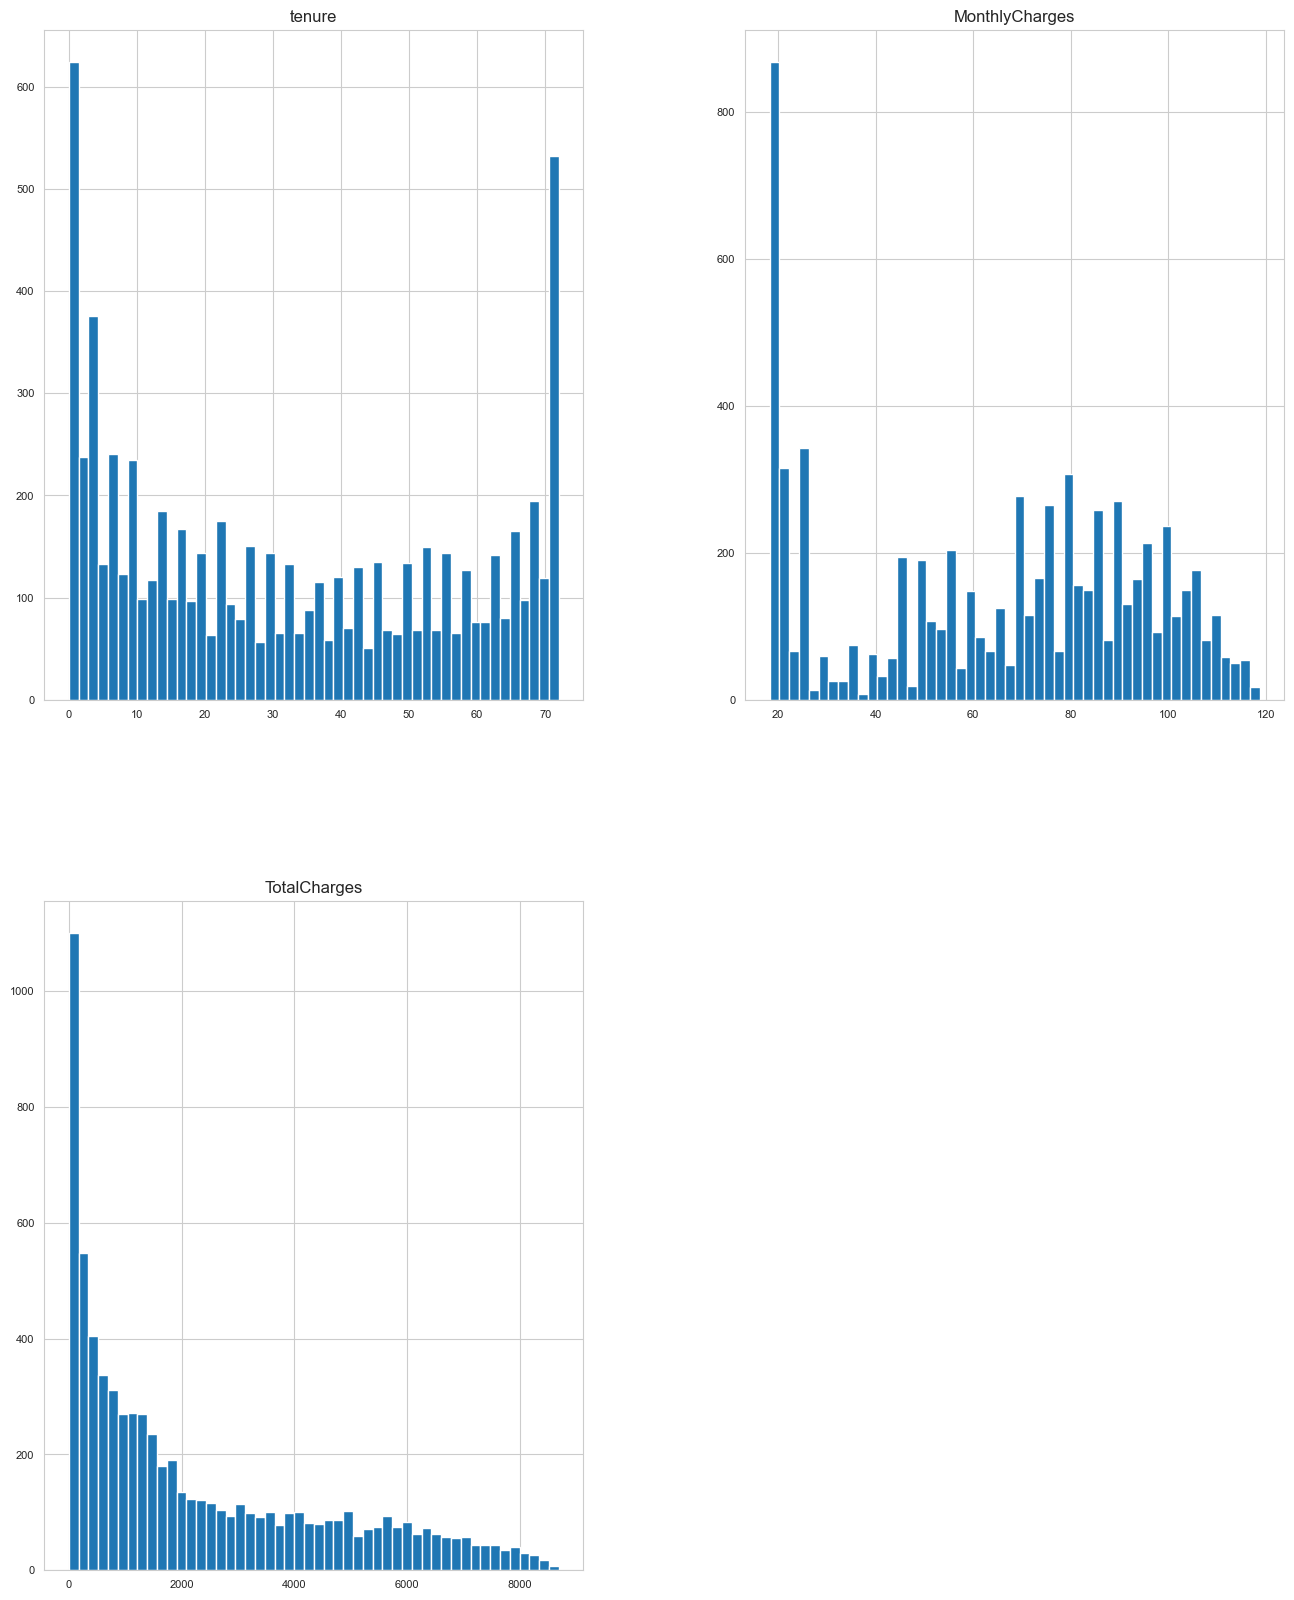

In [22]:
# Distribution of Numerical Variables
numerical_vars = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_vars].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()


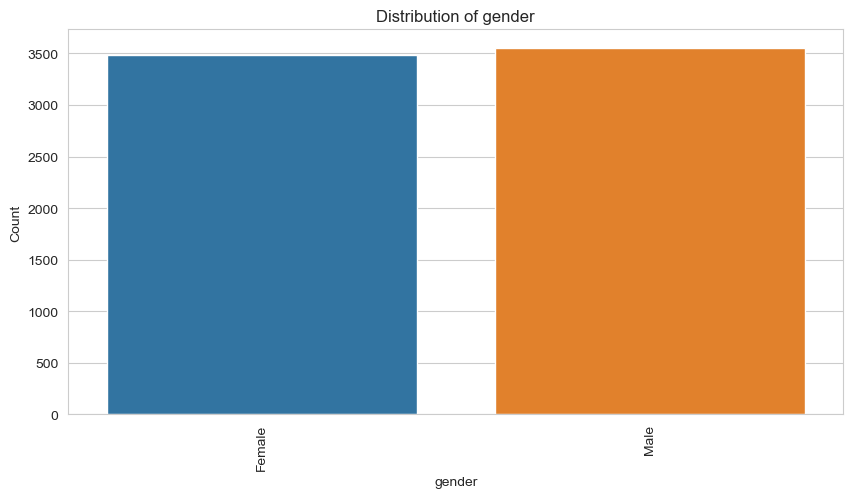

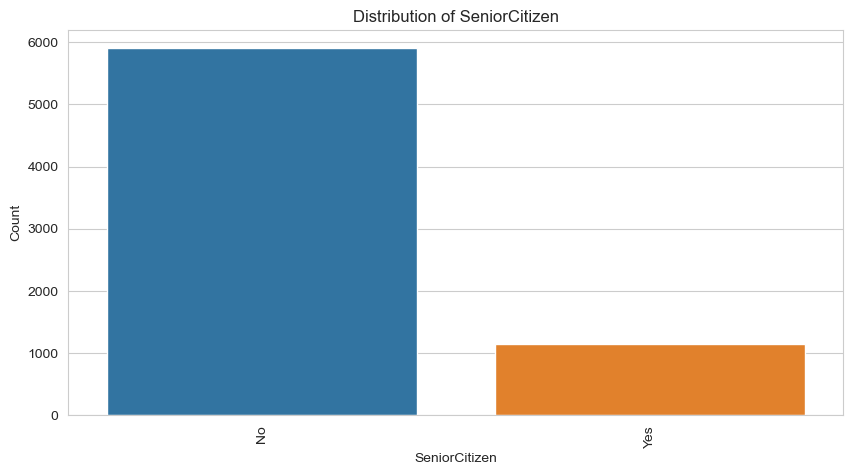

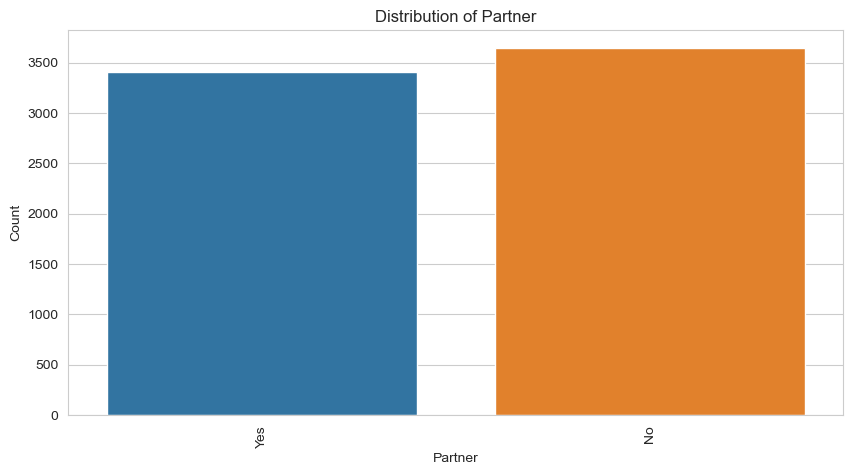

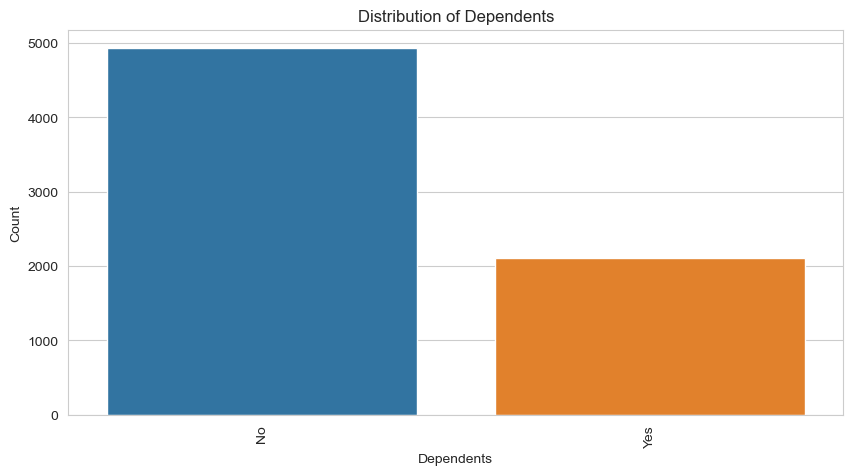

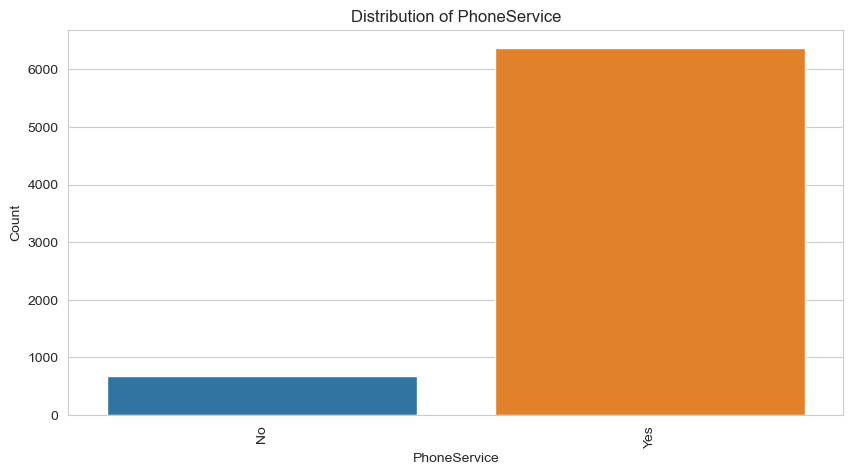

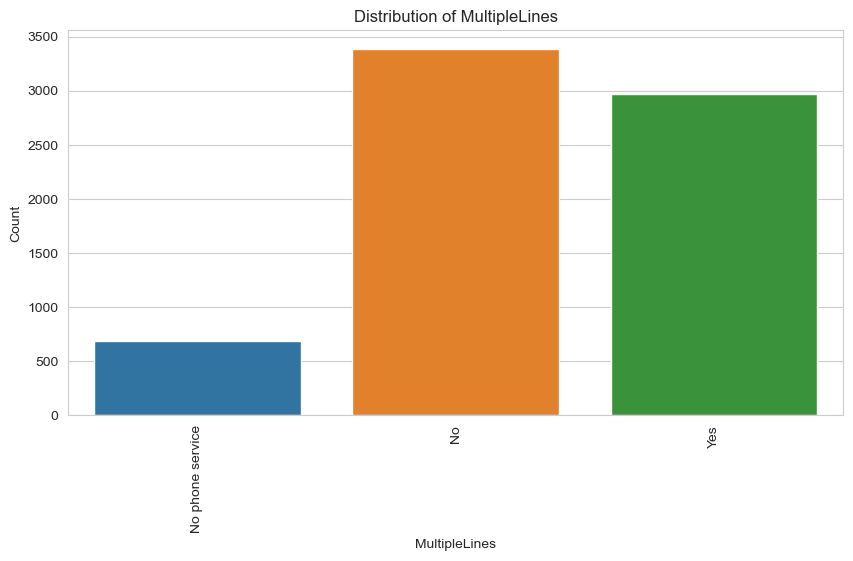

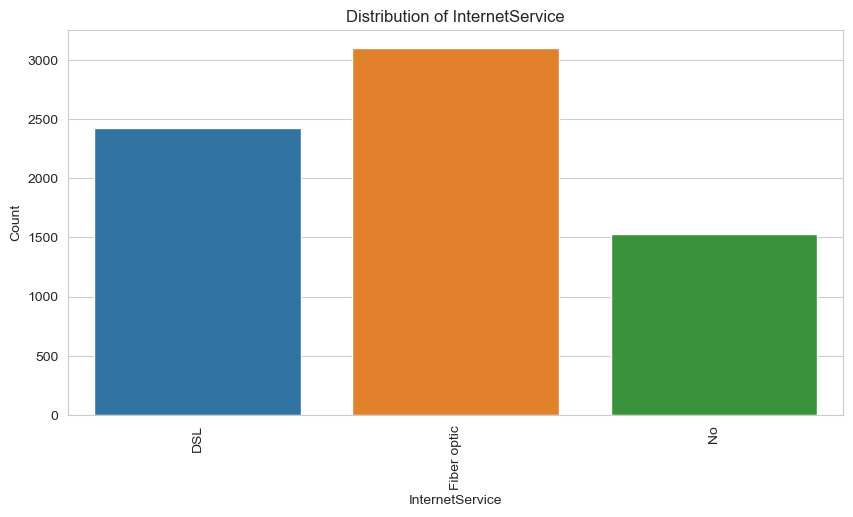

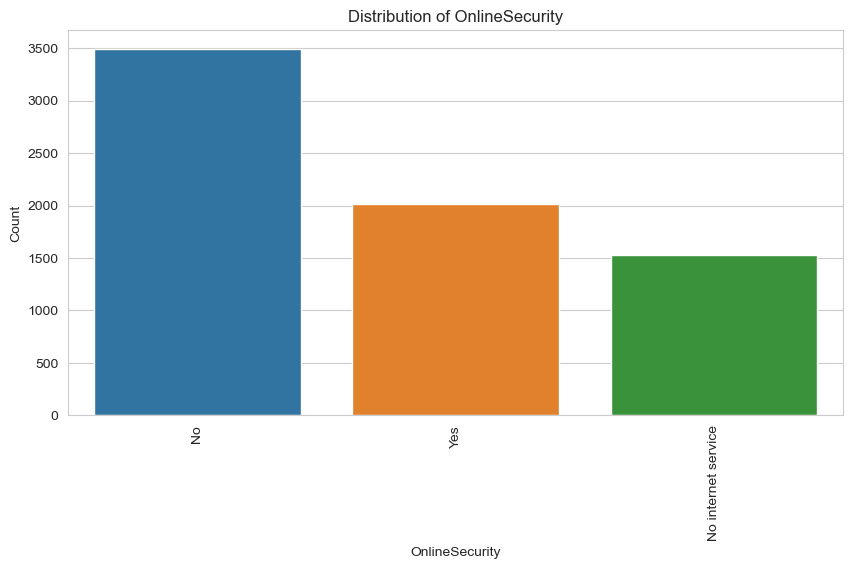

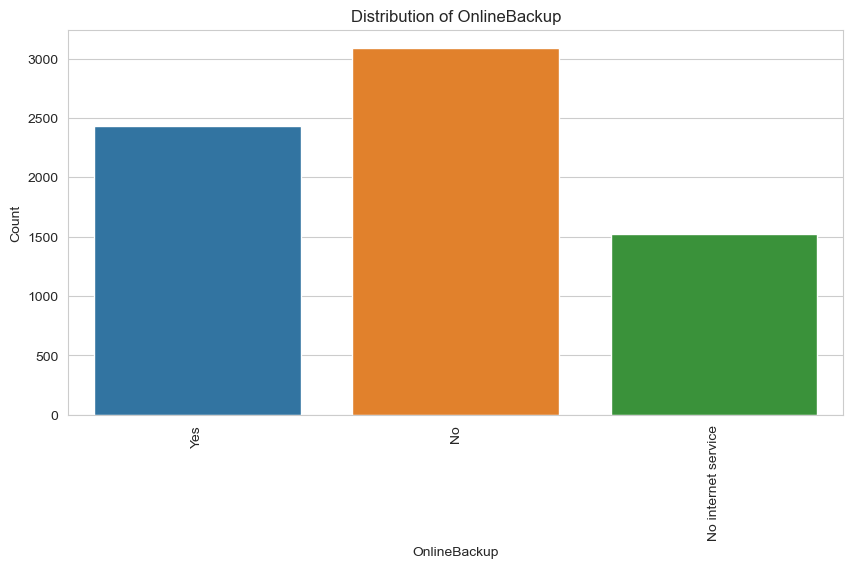

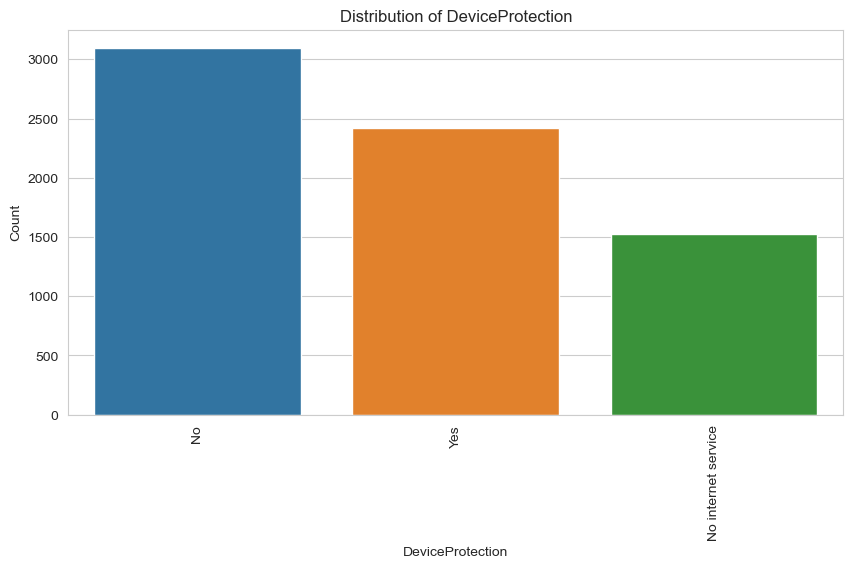

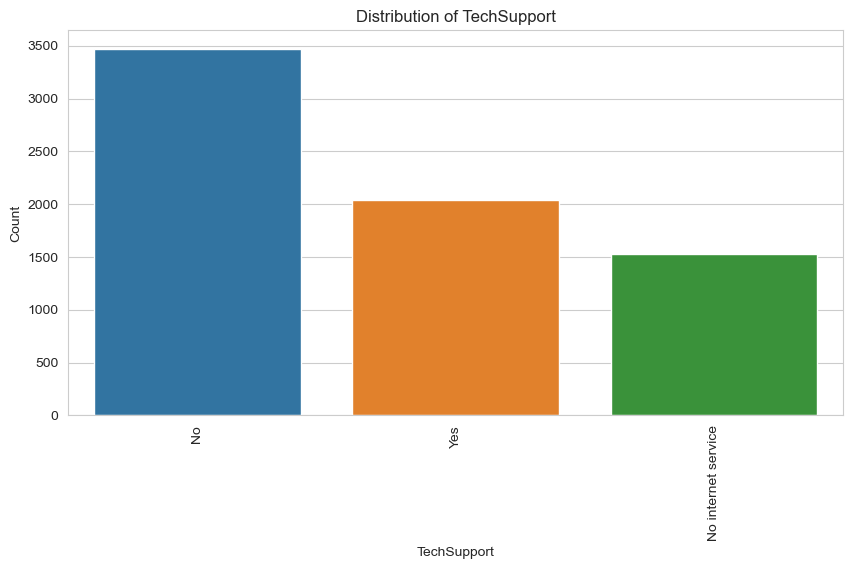

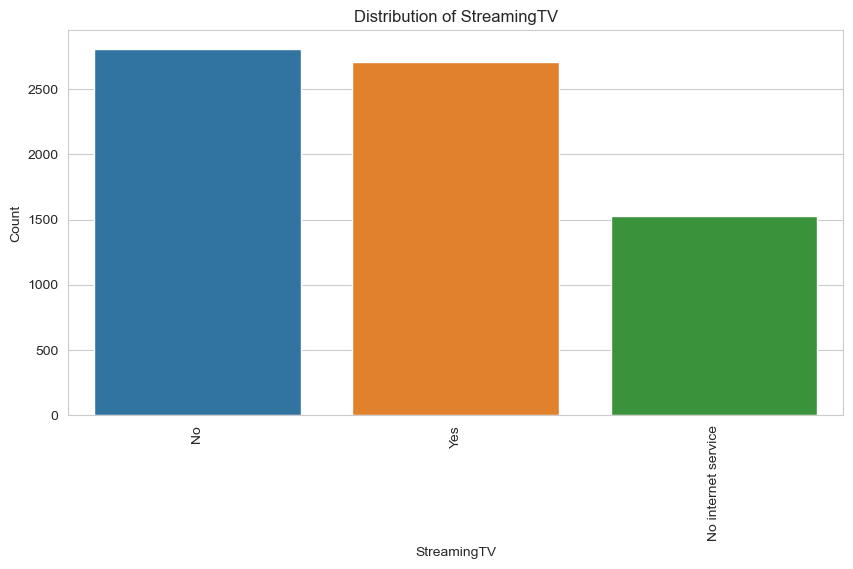

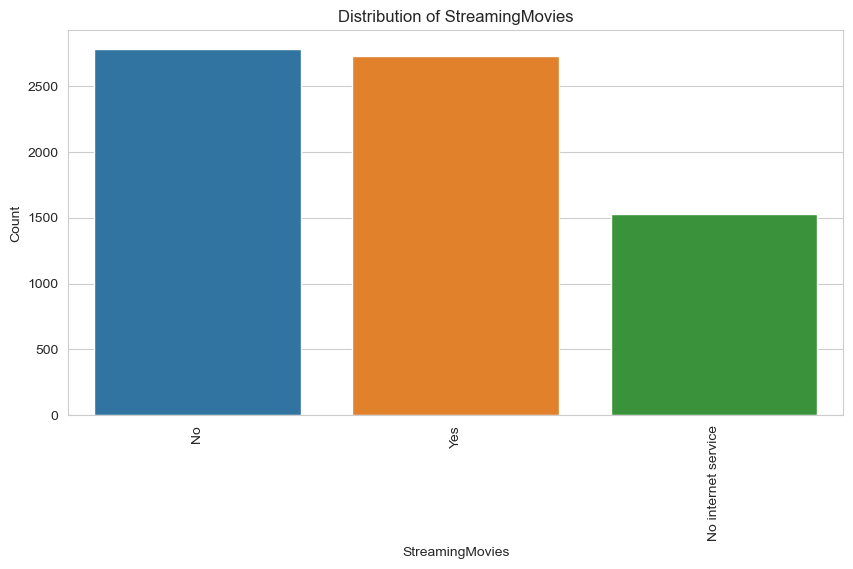

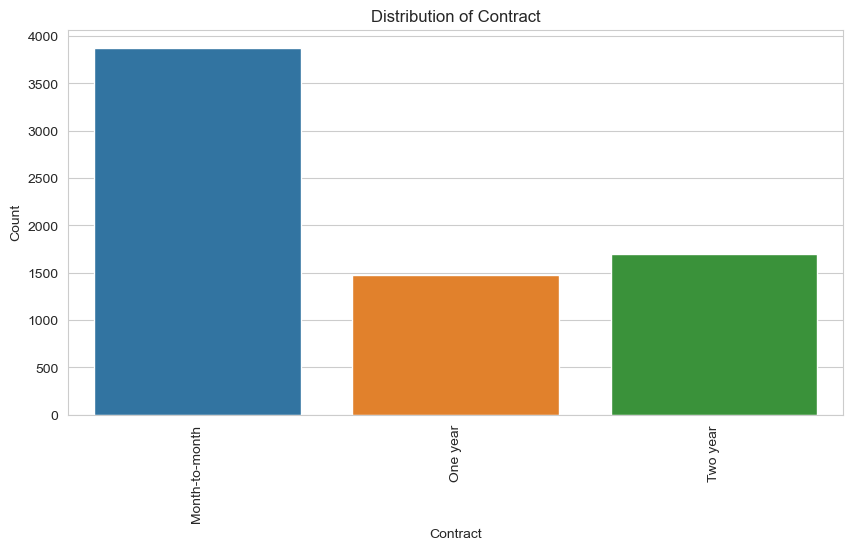

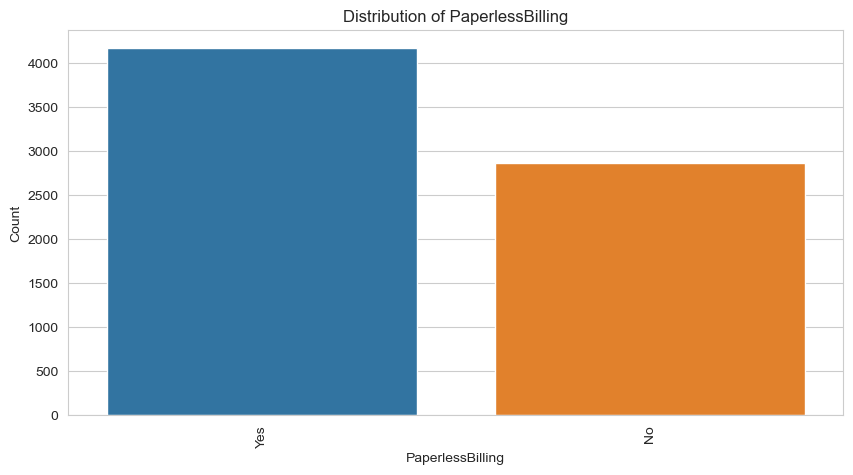

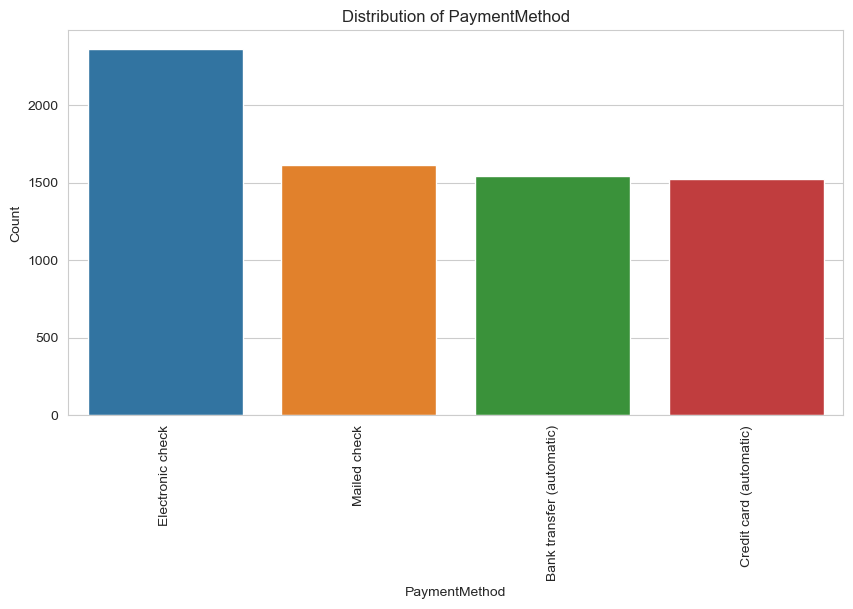

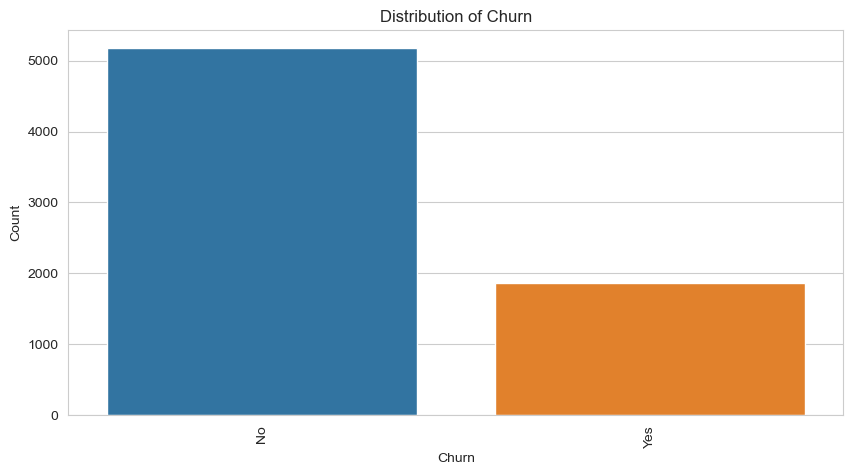

In [23]:
%matplotlib inline
#Distribution of Categorical Variables
categorical_vars = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, hue=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

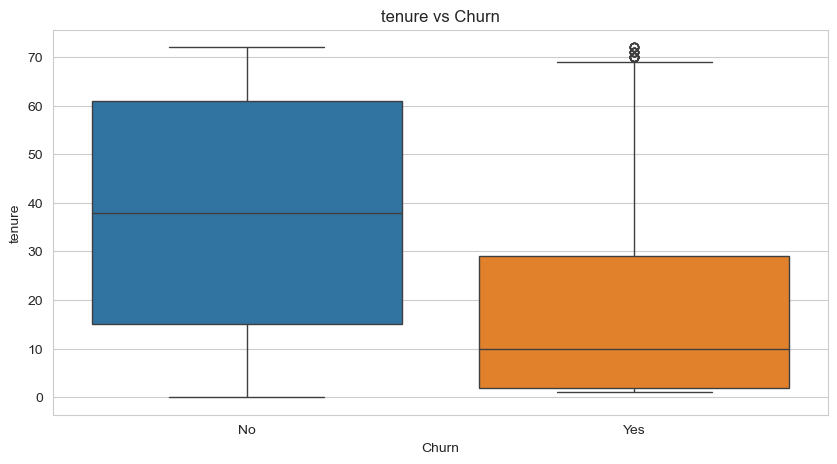

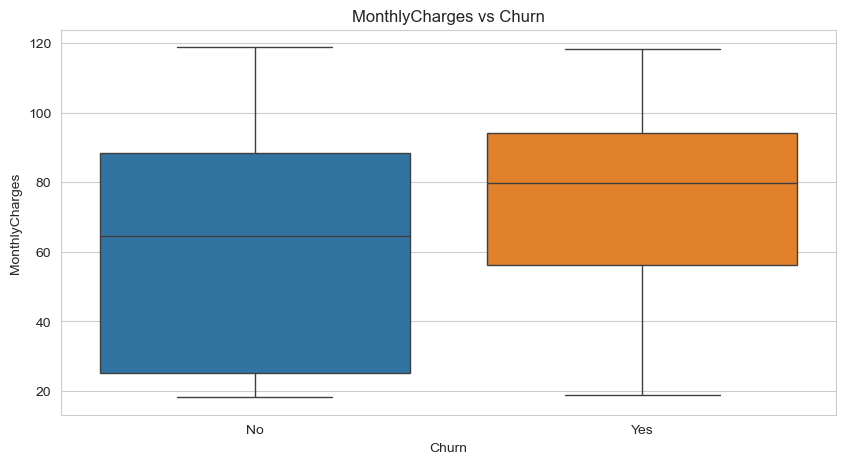

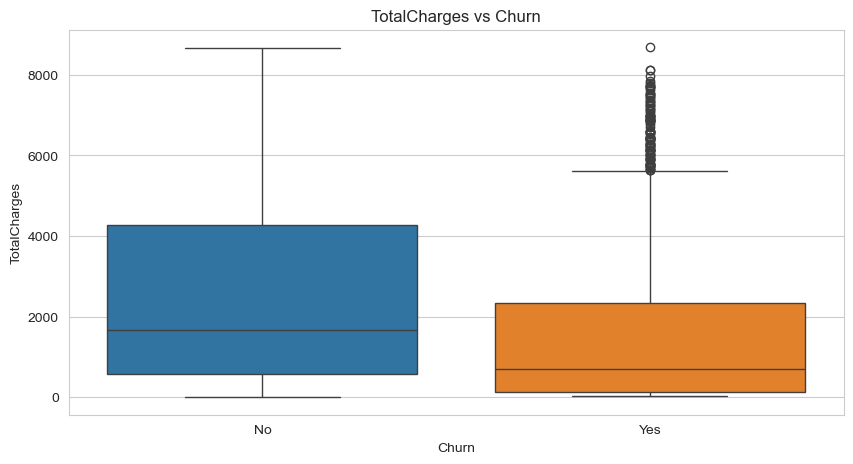

In [24]:
#Boxplots for Numerical Variables against Target Variable
for col in numerical_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Churn', y=col, data=data, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

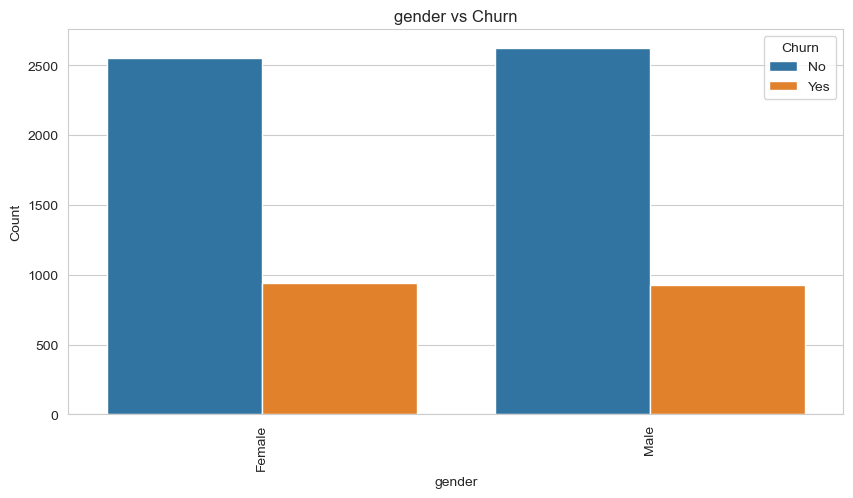

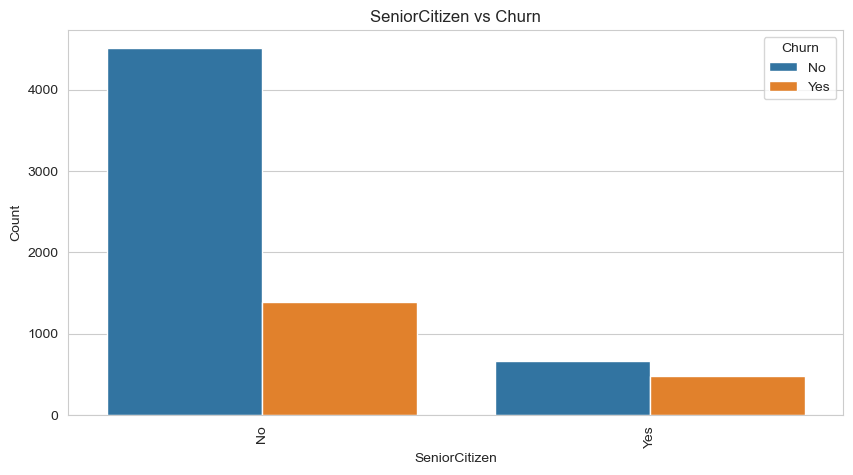

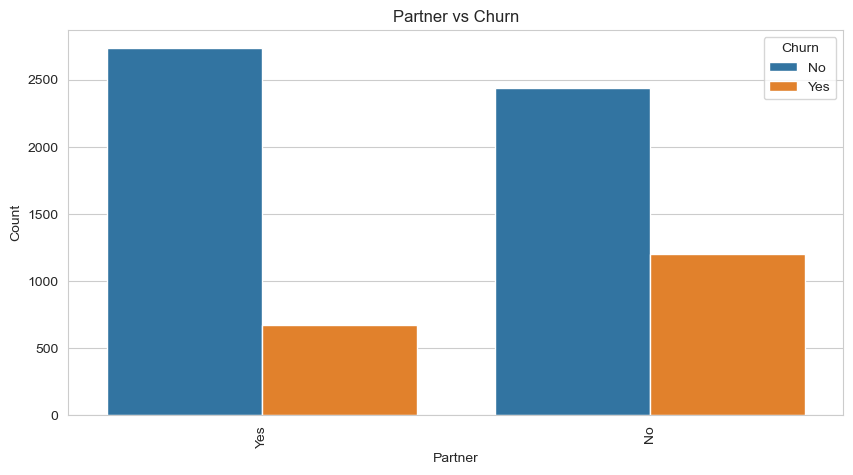

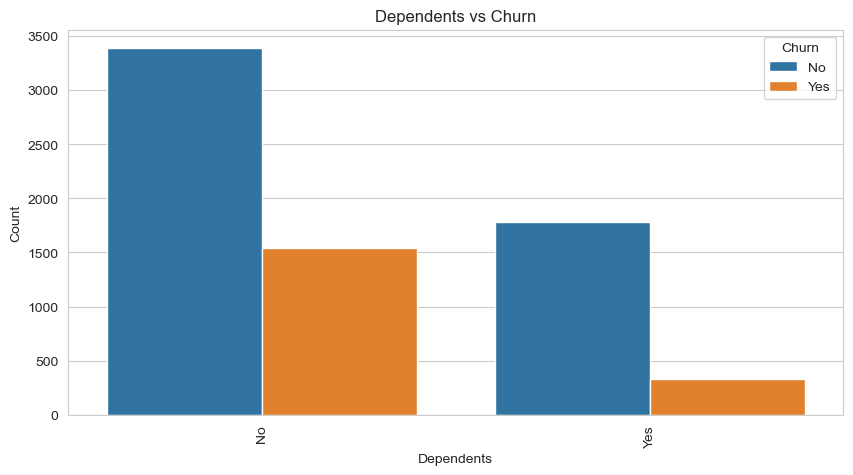

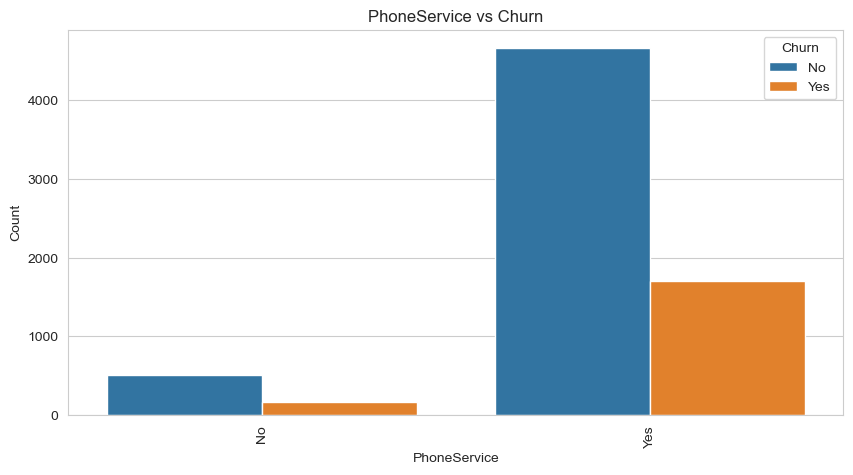

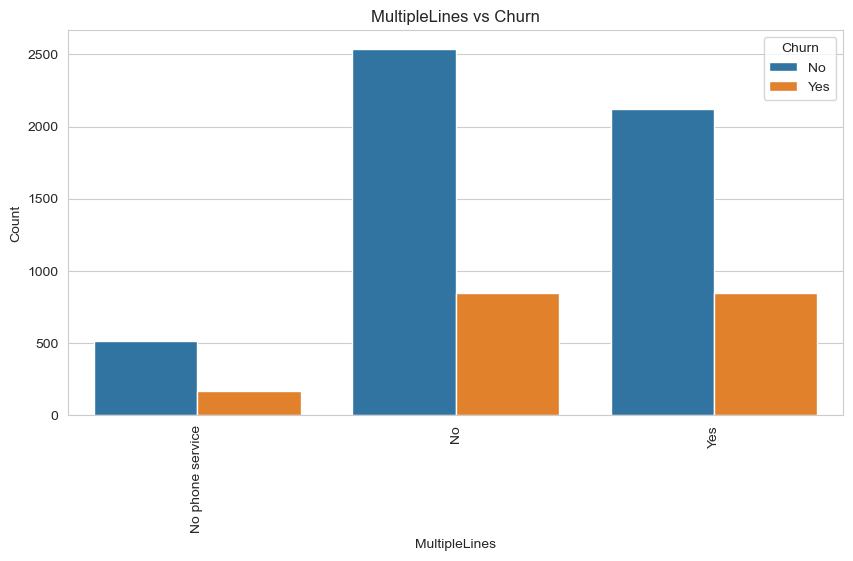

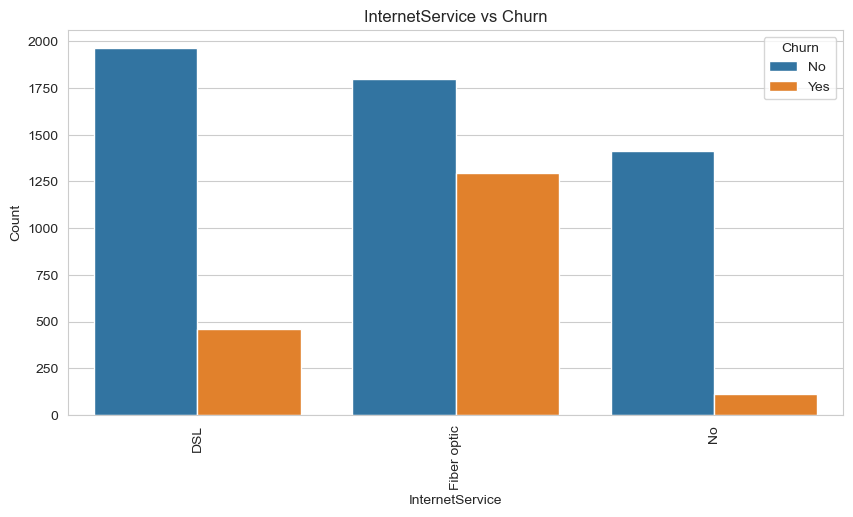

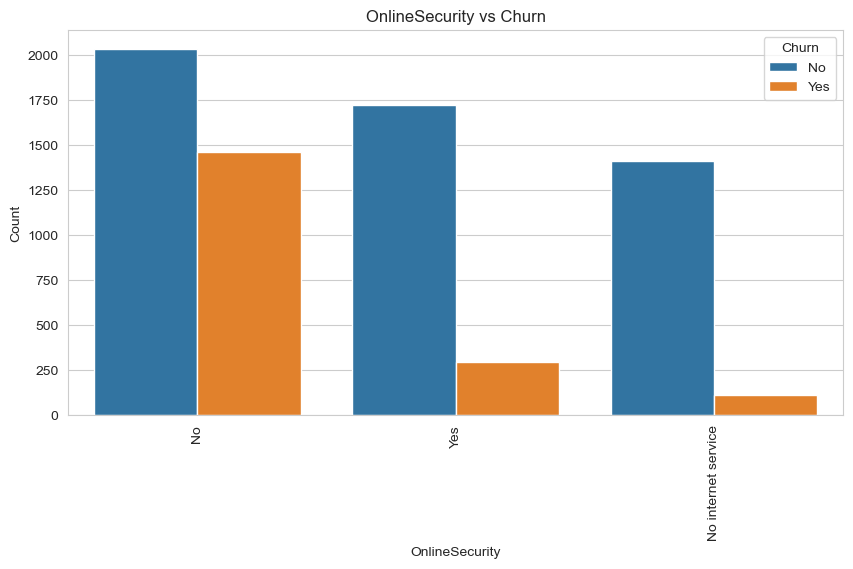

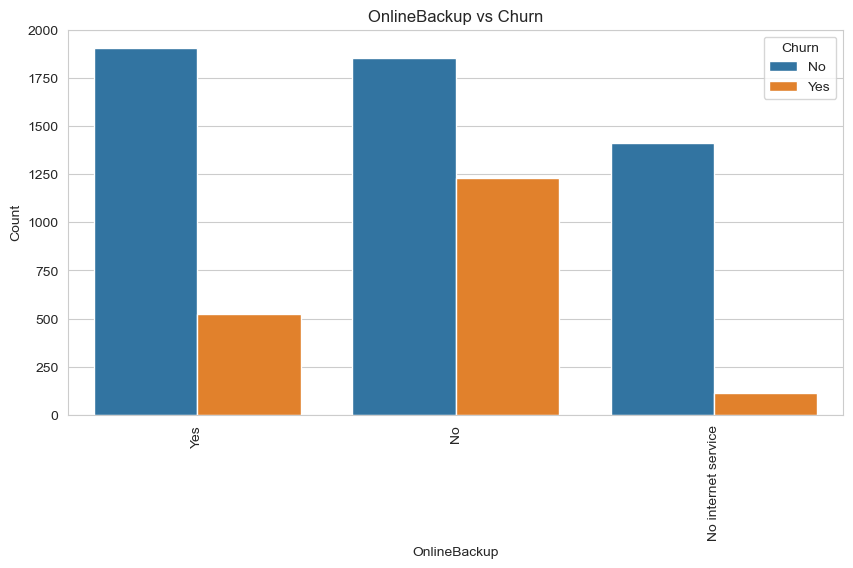

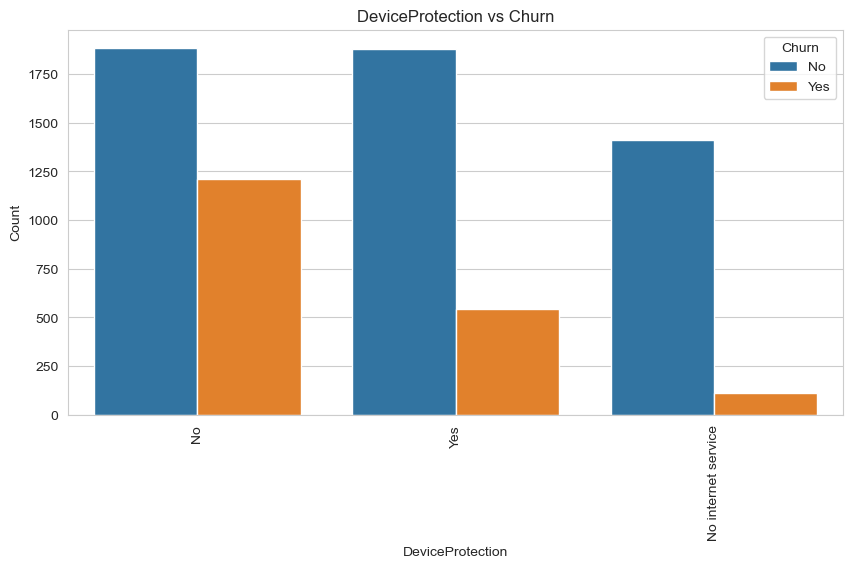

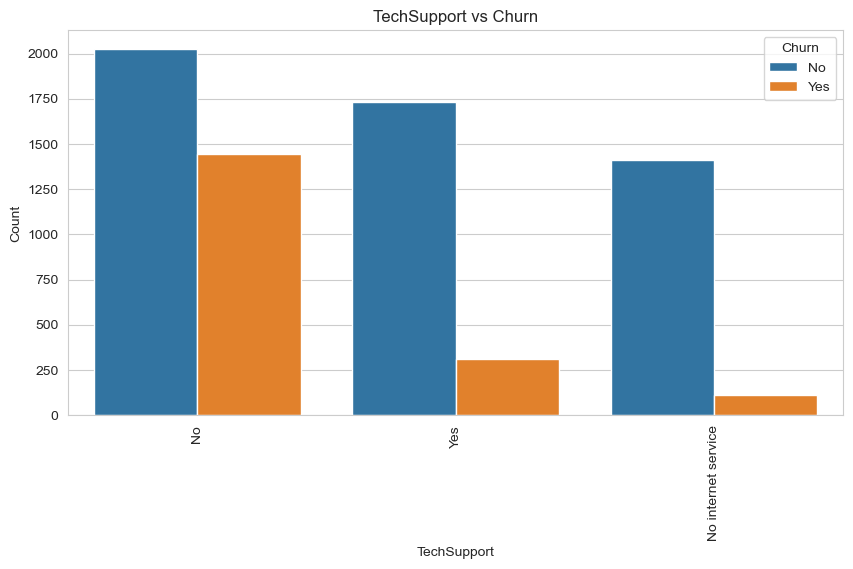

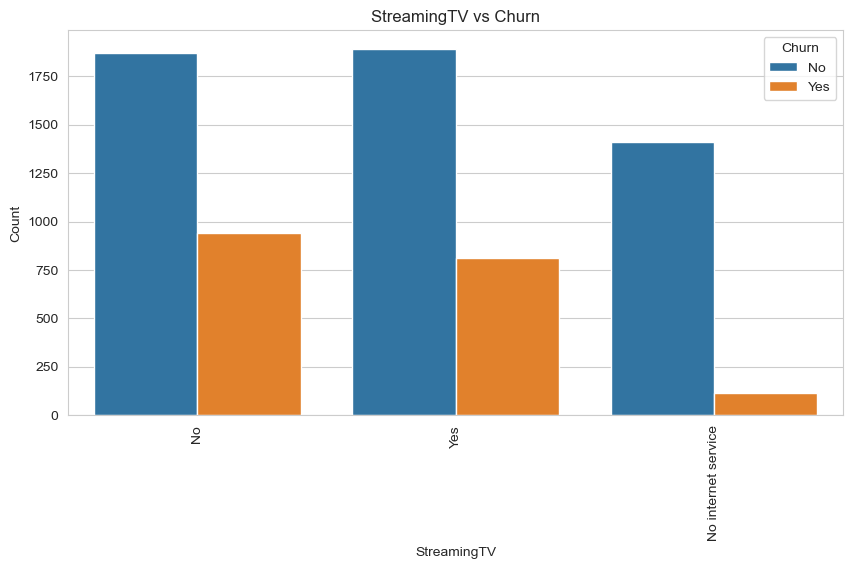

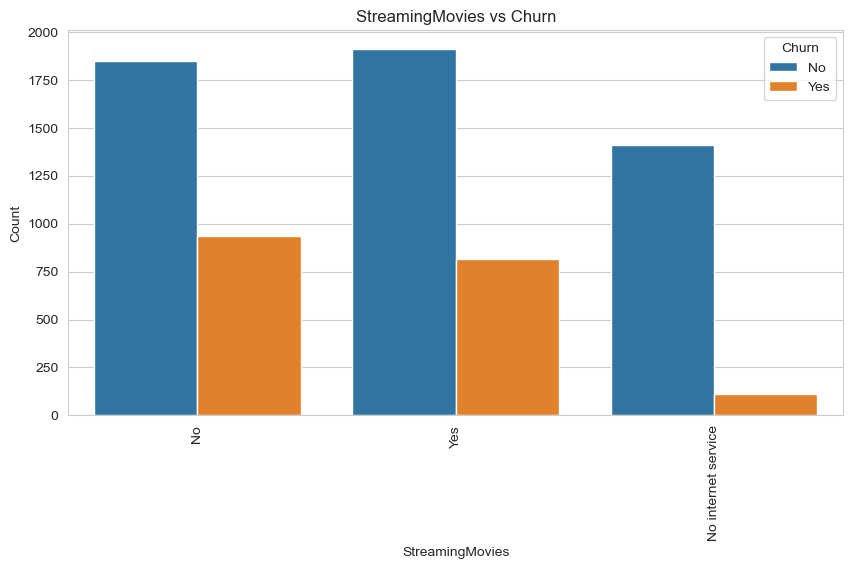

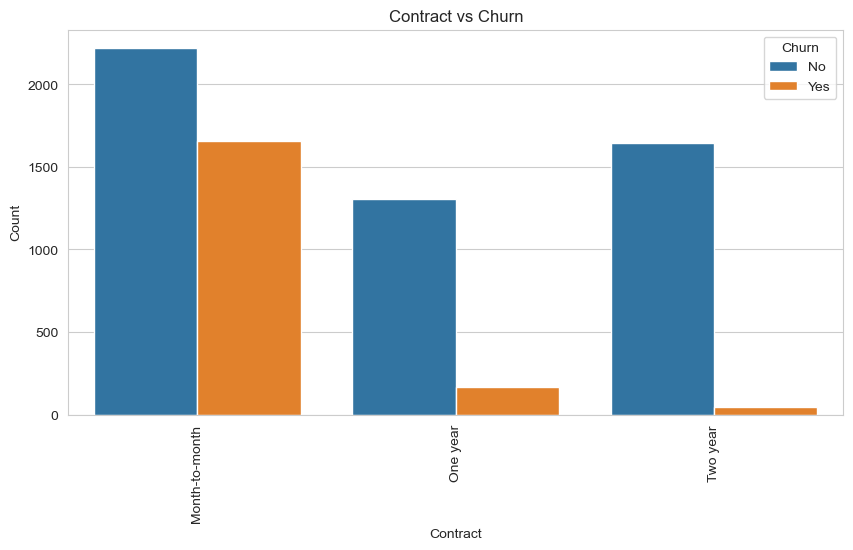

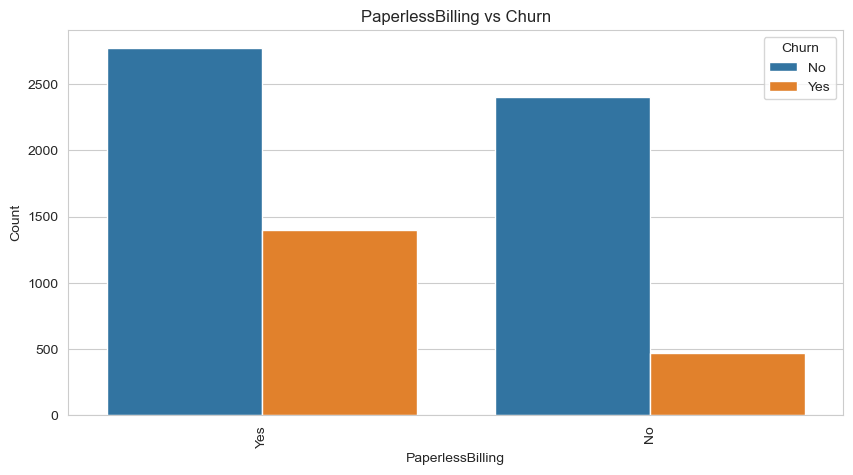

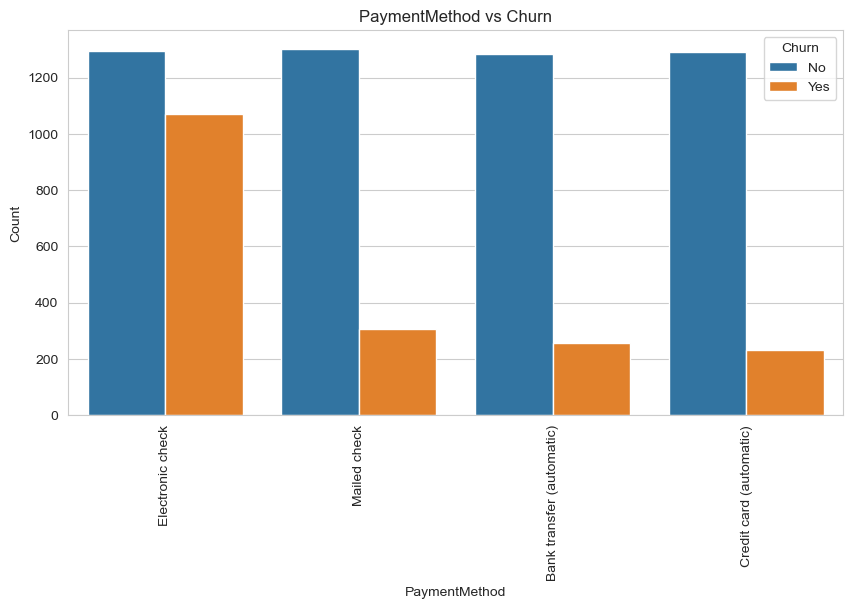

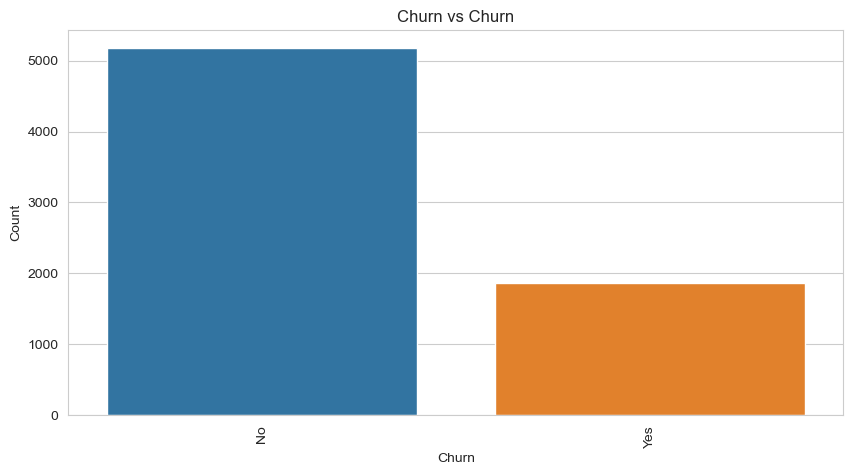

In [26]:
## Countplots for Categorical Variables against Target Variable
for col in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

## Data Preprocessing for Model Building

In [29]:
# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split the data into training and testing sets
X = data.drop(columns=['Churn_Yes'])
y = data['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the numerical features
scaler = MinMaxScaler()
X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

## Logistic Regression

Logistic Regression Evaluation:
Accuracy: 0.812588736393753
Precision: 0.6877637130801688
Recall: 0.5679442508710801
F1 Score: 0.6221374045801527
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.90      0.88      1539
        True       0.69      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



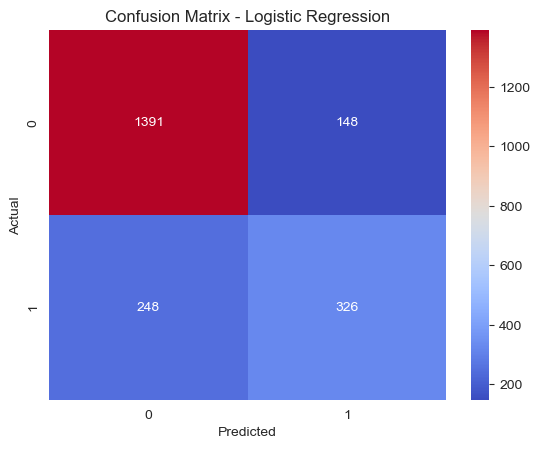

In [32]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluation of Logistic Regression
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest Classifier

Random Forest Classifier Evaluation:
Accuracy: 0.7898722195929957
Precision: 0.6658163265306123
Recall: 0.4547038327526132
F1 Score: 0.5403726708074534
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.91      0.86      1539
        True       0.67      0.45      0.54       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



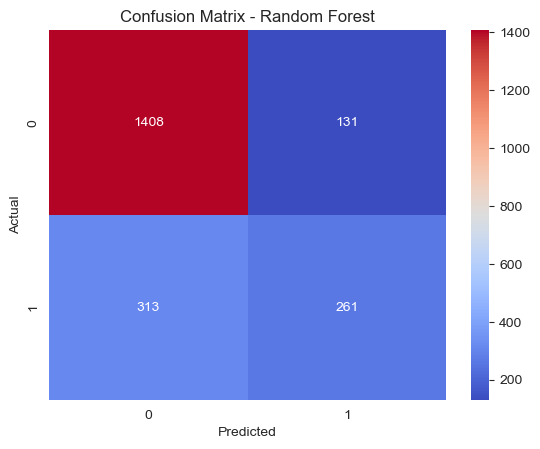

In [35]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation of Random Forest
print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()